# Cityscapes - RefineNet

## 19 semantic classes + void

### RefineNet based on ResNet-101

In [1]:
import sys
sys.path.append('../../')

In [2]:
from models.refinenet_resnet import refinenet_resnet101
pretrained_weight_dir = '../../pretrained/Cityscapes'
model = refinenet_resnet101(pretrained_weight_dir).eval()

In [3]:
import torch
import numpy as np

from torchvision import datasets
from torchvision import transforms

cityscapes = datasets.Cityscapes('/workbench/data/Cityscapes/',
                                 split='val', mode='fine', target_type=['semantic', 'color'],
                                 transform=transforms.ToTensor(),
                                 target_transform=transforms.Lambda(
                                     lambda imgs: tuple(map(np.array, imgs)))
                                )

In [4]:
id2label = {cls.id:cls for cls in cityscapes.classes}
train_id2label = {cls.train_id:cls for cls in cityscapes.classes}
pred_argmax2label = {cls.train_id:cls for cls in cityscapes.classes}
pred_argmax2label[19] = pred_argmax2label[255]
pred_argmax2label.pop(255);

/opt/conda/conda-bld/pytorch_1587428207430/work/torch/csrc/utils/python_arg_parser.cpp:756: UserWarning: This overload of add is deprecated:
	add(Tensor input, Number alpha, Tensor other, *, Tensor out)
Consider using one of the following signatures instead:
	add(Tensor input, Tensor other, *, Number alpha, Tensor out)
/opt/conda/envs/py37torch1.5/lib/python3.8/site-packages/torch/nn/functional.py:2970: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn("Default upsampling behavior when mode={} is changed "


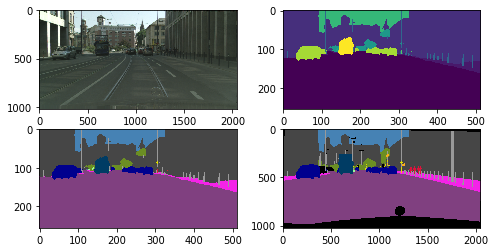

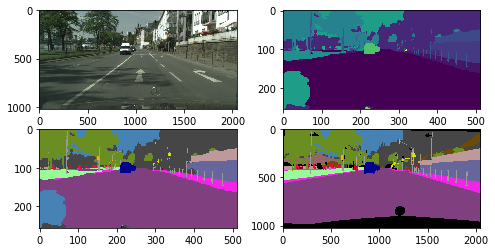

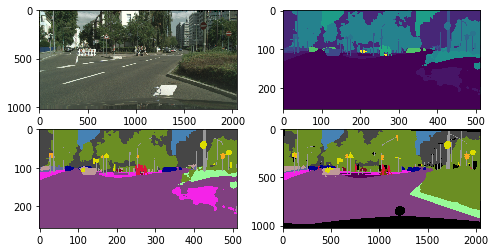

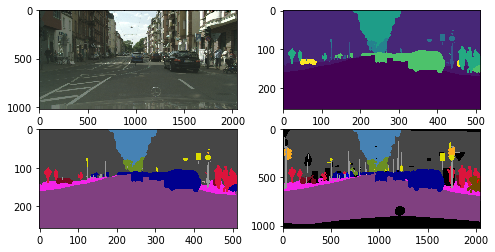

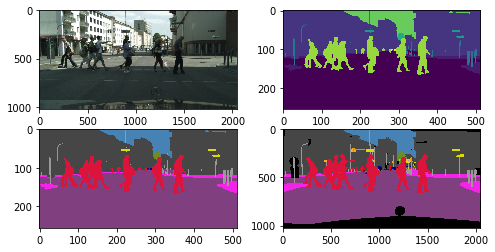

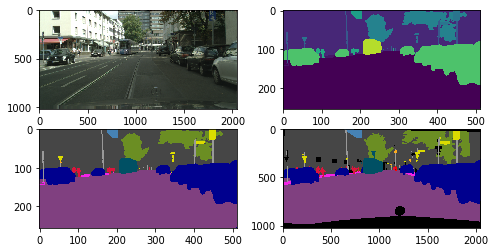

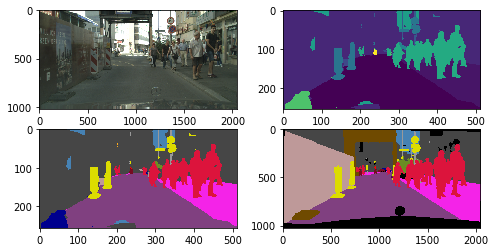

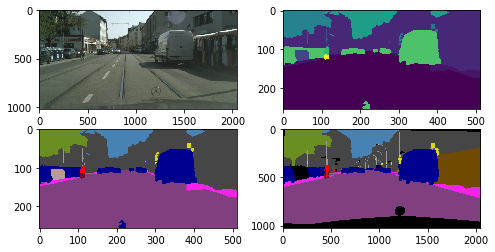

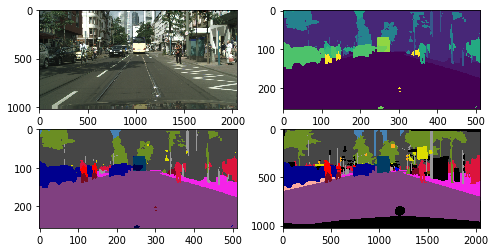

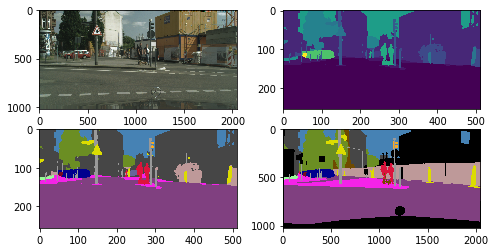

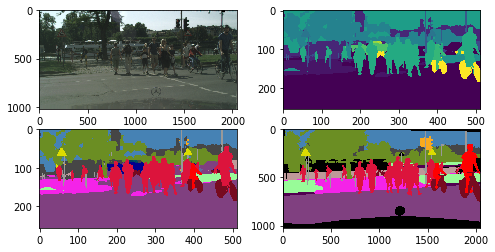

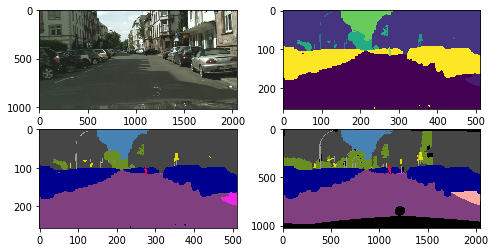

In [5]:
import matplotlib.pyplot as plt

row, col = 2, 2
wid, hei = 4, 2

with torch.no_grad():
    for i, (s, (c1, c2)) in enumerate(cityscapes):
        pred = model(s[None, :]*255)
        pred_color = np.stack(np.vectorize(lambda x: pred_argmax2label[x].color)(pred.argmax(1))).transpose(1, 2, 3, 0)
        
        fig, axax = plt.subplots(row, col, figsize=(wid*col, hei*row))
        axax[0, 0].imshow(s.numpy().transpose(1, 2, 0))
        axax[0, 1].imshow(pred.numpy()[0].transpose(1, 2, 0).argmax(2))
        axax[1, 0].imshow(pred_color[0])
        axax[1, 1].imshow(c2)
        plt.show()
        
        if i > 10:
            break